In [1]:
## Data Modelling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from pathlib import Path
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

repo_root = Path.cwd().resolve().parent   # repo root when notebook is in 'notebooks'
sys.path.append(str(repo_root))

from src.data_modelling import train_model, evaluate_model, computeFeatureOutliers, LinearReg
from src.visualisation import importance_graph

df = pd.read_csv("../data/processed/loans_processed.csv", index_col=False)
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   credit.policy  int.rate  installment  log.annual.inc       dti      fico  \
0            1.0  0.004023     0.879888        0.544762  0.650200  0.104167   
1            1.0  0.003217     0.229916        0.506334  0.476969  0.079167   
2            1.0  0.005171     0.379883        0.404820  0.388184  0.058333   
3            1.0  0.002787     0.158653        0.544762  0.270360  0.083333   
4            1.0  0.005642     0.094378        0.537503  0.499666  0.045833   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           0.312754   0.023898    0.077761        0.000000     0.000000   
1           0.147818   0.027848    0.114478        0.000000     0.000000   
2           0.259495   0.002908    0.038209        0.030303     0.000000   
3           0.144379   0.027885    0.109254        0.030303     0.000000   
4           0.222613   0.003926    0.058955        0.000000     0.076923   

   pub.rec  purpose_all_other  purpose_

#### Check feature correlation

In [3]:
df.corr(method='pearson').style.background_gradient(cmap='coolwarm')

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,not.fully.paid
credit.policy,1.000000,-0.032011,0.058770,0.035647,-0.090901,0.318385,0.098109,-0.187501,-0.105376,-0.532532,-0.074903,-0.052695,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511,-0.158119
int.rate,-0.032011,1.000000,0.020393,-0.002072,0.029913,-0.104044,-0.030600,0.014623,0.073276,0.020461,0.030309,0.009755,-0.007054,-0.011156,0.018178,-0.005358,-0.010518,-0.012281,0.016324,0.014945
installment,0.058770,0.020393,1.000000,0.448422,0.050202,0.076617,0.182977,0.233603,0.078311,-0.008573,-0.003836,-0.031902,-0.203103,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654,0.049955
log.annual.inc,0.035647,-0.002072,0.448422,1.000000,-0.053474,0.107494,0.335006,0.372424,0.060202,0.028383,0.029416,0.016618,-0.080743,0.073086,-0.025965,-0.119780,0.116661,-0.030964,0.091651,-0.033204
dti,-0.090901,0.029913,0.050202,-0.053474,1.000000,-0.223261,0.060146,0.188730,0.326975,0.030543,-0.021588,0.006600,-0.125825,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245,0.037362
fico,0.318385,-0.104044,0.076617,0.107494,-0.223261,1.000000,0.244437,-0.011497,-0.474660,-0.173120,-0.197634,-0.134889,0.056475,-0.006863,-0.140471,-0.013193,0.096125,0.059023,0.055227,-0.131705
days.with.cr.line,0.098109,-0.030600,0.182977,0.335006,0.060146,0.244437,1.000000,0.229372,-0.019597,-0.042094,0.081639,0.071330,-0.055570,0.046074,-0.009905,-0.042764,0.068028,-0.020694,0.034789,-0.028858
revol.bal,-0.187501,0.014623,0.233603,0.372424,0.188730,-0.011497,0.229372,1.000000,0.204336,0.023427,-0.032828,-0.030661,-0.067750,0.072301,0.005832,-0.034751,0.003248,-0.062404,0.083059,0.053790
revol.util,-0.105376,0.073276,0.078311,0.060202,0.326975,-0.474660,-0.019597,0.204336,1.000000,-0.011799,-0.042373,0.065237,-0.132383,0.087361,0.207429,-0.053715,-0.113111,-0.105601,-0.060368,0.078895
inq.last.6mths,-0.532532,0.020461,-0.008573,0.028383,0.030543,-0.173120,-0.042094,0.023427,-0.011799,1.000000,0.021026,0.073813,0.014538,-0.032944,-0.042866,0.024687,0.044465,-0.001012,0.043197,0.149654


In [4]:
computeFeatureOutliers(df)

,feature_names,outlier_percentages
0,credit.policy,100.000000
1,int.rate,0.553351
2,installment,2.463980
3,log.annual.inc,2.599708
4,dti,0.000000
5,fico,0.093965
6,days.with.cr.line,3.612445
7,revol.bal,8.143663
8,revol.util,0.010441
9,inq.last.6mths,7.788682


In [5]:
log_model, feature_names, X_test, y_test = train_model('Logistic Regression', df, 'not.fully.paid')

              precision    recall  f1-score   support

           0       0.91      0.63      0.75      1611
           1       0.26      0.67      0.37       305

    accuracy                           0.64      1916
   macro avg       0.58      0.65      0.56      1916
weighted avg       0.81      0.64      0.69      1916

[[1017  594]
 [ 100  205]]
Accuracy: 0.6378
ROC AUC: 0.7058


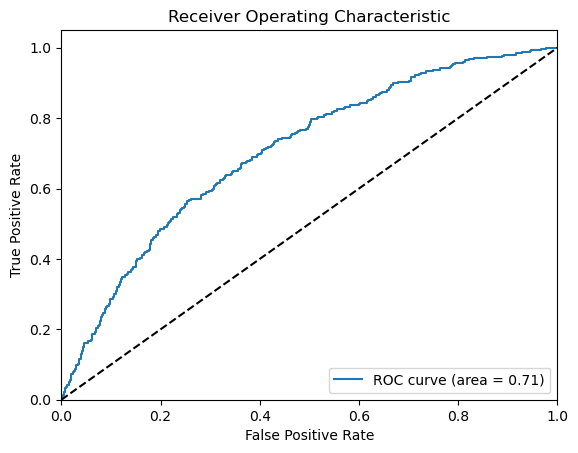

ValueError: too many values to unpack (expected 4)

In [6]:
accuracy, roc_auc, class_report, conf_matrix = evaluate_model(log_model, X_test, y_test)
print("Default Threshold (0.5) Results:")
print(class_report)
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Lower the decision threshold to 0.3 to increase recall for defaults
y_pred_proba = log_model.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred_new = (y_pred_proba >= threshold).astype(int)

print(f"\nLowered Threshold ({threshold}) Results:")
print(classification_report(y_test, y_pred_new))
print(confusion_matrix(y_test, y_pred_new))
print(f"Accuracy: {accuracy_score(y_test, y_pred_new):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")  # ROC AUC unchanged

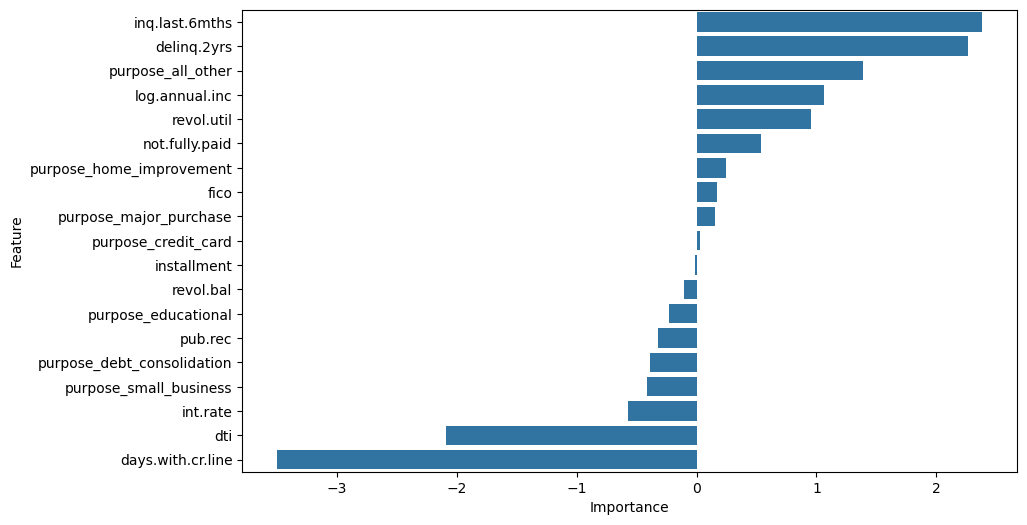

In [ ]:
importances = log_model.coef_[0]
feature_names = df.columns[1:]  

importance_graph(feature_names, importances)

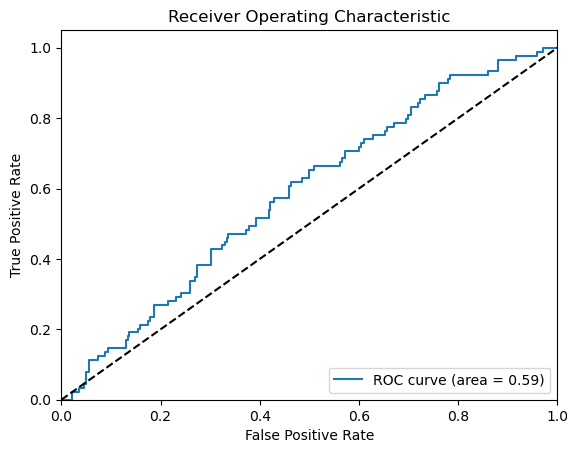

Default Threshold (0.5) Results:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       285
           1       0.00      0.00      0.00        89

    accuracy                           0.75       374
   macro avg       0.38      0.49      0.43       374
weighted avg       0.58      0.75      0.65       374

[[280   5]
 [ 89   0]]
Accuracy: 0.7487
ROC AUC: 0.5857

Lowered Threshold (0.4) Results:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       285
           1       0.33      0.12      0.18        89

    accuracy                           0.73       374
   macro avg       0.55      0.52      0.51       374
weighted avg       0.67      0.73      0.68       374

[[263  22]
 [ 78  11]]
Accuracy: 0.7326
ROC AUC: 0.5857


In [ ]:
df_clustered = df[df['credit.policy'] == 0]
log_model, feature_names, X_test, y_test = train_model('Logistic Regression', df_clustered, 'not.fully.paid')
accuracy, roc_auc, class_report, conf_matrix= evaluate_model(log_model, X_test, y_test)
print("Default Threshold (0.5) Results:")
print(class_report)
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Lower the decision threshold to 0.3 to increase recall for defaults
y_pred_proba = log_model.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_new = (y_pred_proba >= threshold).astype(int)

print(f"\nLowered Threshold ({threshold}) Results:")
print(classification_report(y_test, y_pred_new))
print(confusion_matrix(y_test, y_pred_new))
print(f"Accuracy: {accuracy_score(y_test, y_pred_new):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")  # ROC AUC unchanged



In [10]:
rfc_model, feature_names, X_test, y_test = train_model('Random Forest', df, 'not.fully.paid')
y_proba = rfc_model.predict_proba(X_test)[:, 1]
# Clip probabilities to avoid log(0) or log(inf)
y_proba_clipped = np.clip(y_proba, 1e-15, 1 - 1e-15)
credit_scores = 600 - 50 * np.log(y_proba_clipped / (1 - y_proba_clipped))
print("Credit Scores for the test set:")    
print(credit_scores)

Credit Scores for the test set:
[581.80173114 672.50050878 704.53705485 ... 666.24627074 633.16471087
 729.3344672 ]


Text(0.5, 1.0, 'Distribution of Credit Scores')

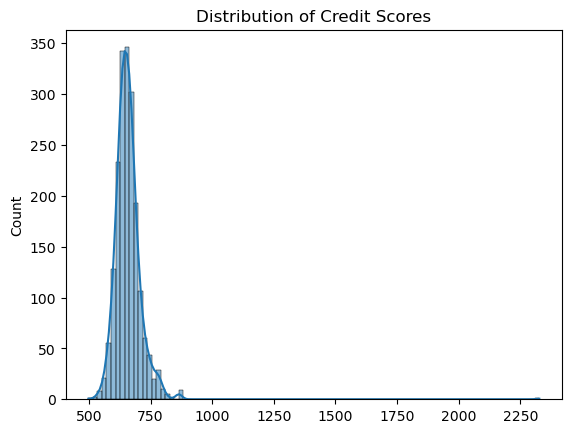

In [13]:
sns.histplot(credit_scores, bins=100, kde=True)
plt.title("Distribution of Credit Scores")

              precision    recall  f1-score   support

           0       0.86      0.94      0.89      1611
           1       0.33      0.16      0.22       305

    accuracy                           0.81      1916
   macro avg       0.59      0.55      0.56      1916
weighted avg       0.77      0.81      0.79      1916

[[1511  100]
 [ 255   50]]
Accuracy: 0.8147
ROC AUC: 0.6575


C:\Users\elena\Ellen\My_Projects\Lending-Club\src\data_modelling.py:47: RuntimeWarning: divide by zero encountered in log
  credit_score = A-B*np.log(y_proba/(1-y_proba)) # Example credit score formula


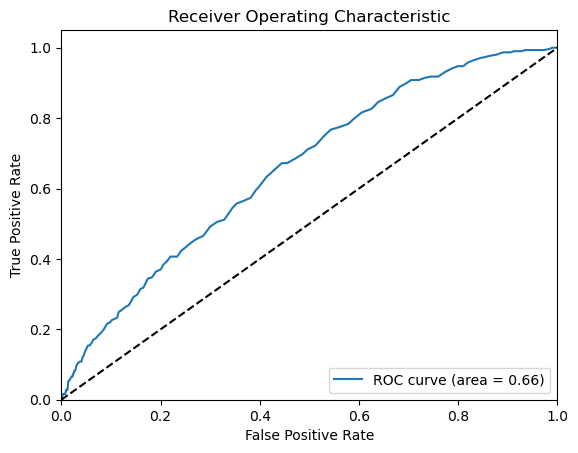

ValueError: too many values to unpack (expected 4)

In [14]:
accuracy, roc_auc, class_report, conf_matrix = evaluate_model(rfc_model, X_test, y_test)
print(class_report)
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

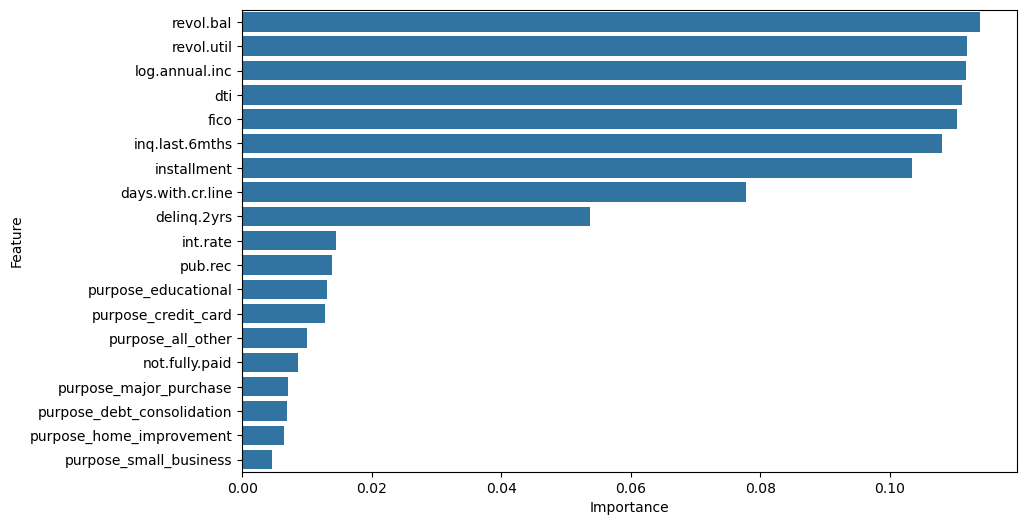

In [ ]:
rfc_importances = rfc_model.feature_importances_
feat_labels = df.columns[1:]
importance_graph(feat_labels, rfc_importances)

In [ ]:
xgb_model, feature_names, X_test, y_test = train_model('XGBoost', df, 'not.fully.paid')

c:\Users\elena\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:27:22] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


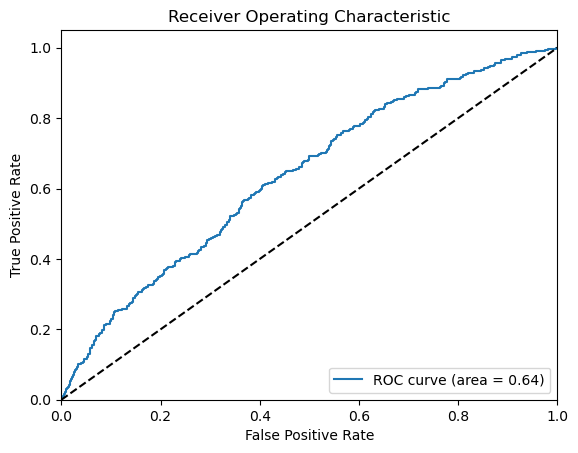

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1611
           1       0.35      0.10      0.15       305

    accuracy                           0.83      1916
   macro avg       0.60      0.53      0.53      1916
weighted avg       0.77      0.83      0.78      1916

[[1556   55]
 [ 275   30]]
Accuracy: 0.8278
ROC AUC: 0.6363


In [ ]:
accuracy, roc_auc, class_report, conf_matrix = evaluate_model(xgb_model, X_test, y_test)
print(class_report)
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

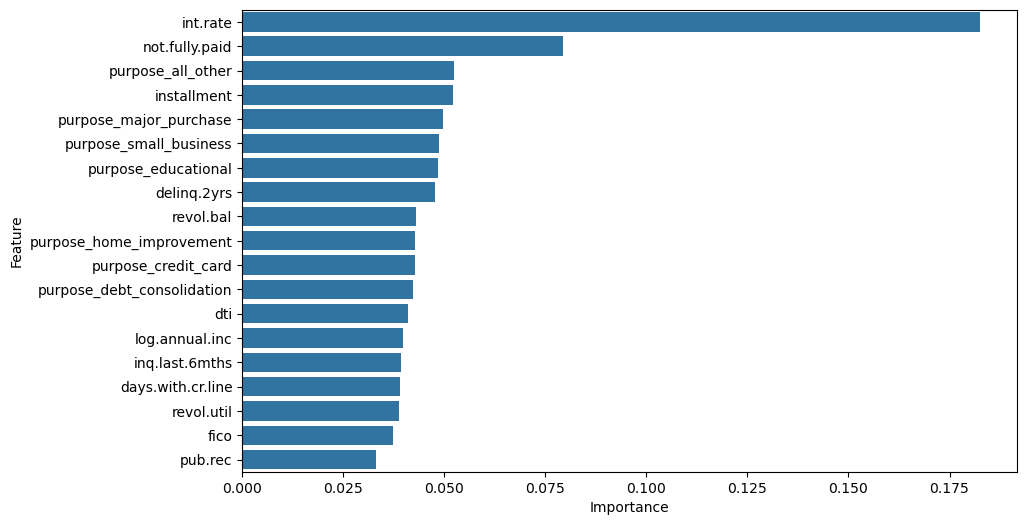

In [ ]:
xgb_importances = xgb_model.feature_importances_
feat_labels = df.columns[1:]
importance_graph(feat_labels, xgb_importances)

In [ ]:
df_home = pd.read_csv("../data/processed/loans_home_improvement_processed.csv", index_col=False)
print("First 5 rows of the dataset:")
df_home = df_home.drop(columns=['purpose'])
print(df_home.head())

First 5 rows of the dataset:
   credit.policy  int.rate  installment  log.annual.inc       dti      fico  \
0            1.0  0.003648     0.077363        0.552950  0.575768  0.058333   
1            1.0  0.000977     0.151124        0.626125  0.000000  0.137500   
2            1.0  0.001414     0.067877        0.581696  0.378171  0.125000   
3            1.0  0.002275     0.155873        0.652243  0.398198  0.087500   
4            1.0  0.001414     0.152704        0.652243  0.185247  0.108333   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           0.218203   0.057902    0.076269        0.030303          0.0   
1           0.398030   0.005013    0.029104        0.000000          0.0   
2           0.336808   0.006025    0.019552        0.000000          0.0   
3           0.247409   0.050166    0.058507        0.030303          0.0   
4           0.219921   0.033904    0.039254        0.000000          0.0   

   pub.rec  not.fully.paid  
0      0.0

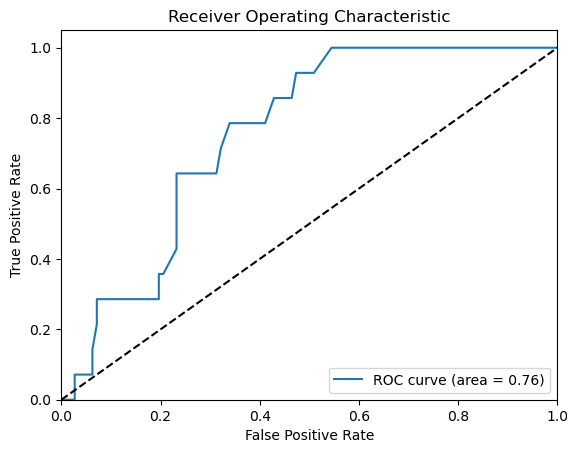

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       112
           1       0.17      0.07      0.10        14

    accuracy                           0.86       126
   macro avg       0.53      0.51      0.51       126
weighted avg       0.81      0.86      0.83       126

[[107   5]
 [ 13   1]]
Accuracy: 0.8571
ROC AUC: 0.7570


In [ ]:
log_h_model, feature_names, X_test, y_test = train_model('Random Forest', df_home, 'not.fully.paid')
accuracy, roc_auc, class_report, conf_matrix = evaluate_model(log_h_model, X_test, y_test)
print(class_report)
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

First 5 rows of the dataset:


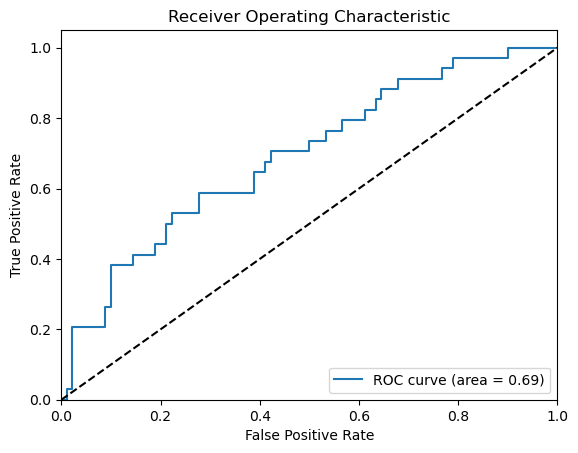

              precision    recall  f1-score   support

           0       0.74      0.98      0.84        90
           1       0.60      0.09      0.15        34

    accuracy                           0.73       124
   macro avg       0.67      0.53      0.50       124
weighted avg       0.70      0.73      0.65       124

[[88  2]
 [31  3]]
Accuracy: 0.7339
ROC AUC: 0.6915


In [ ]:
df_dc = pd.read_csv("../data/processed/loans_small_business_processed.csv", index_col=False)
print("First 5 rows of the dataset:")
df_dc = df_dc.drop(columns=['purpose'])
log_h_model, feature_names, X_test, y_test = train_model('Logistic Regression', df_dc, 'not.fully.paid')
accuracy, roc_auc, class_report, conf_matrix = evaluate_model(log_h_model, X_test, y_test)
print(class_report)
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

In [15]:
LinearReg(df, 'fico')

NameError: name 'LinearReg' is not defined